In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Path to dataset in Colab
file_path = "/content/Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project.csv"

# Read the dataset
df = pd.read_csv(file_path)

<ipython-input-9-de37ad1f0287>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  traffic_data['hour_beginning'] = pd.to_datetime(traffic_data['hour_beginning'])


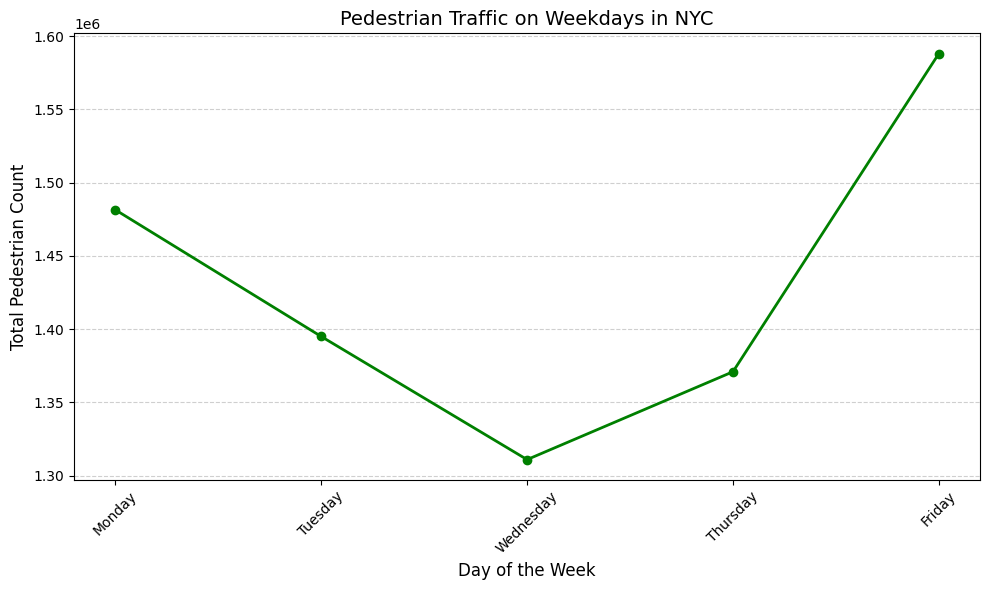

In [9]:
traffic_data = pd.read_csv(file_path)

# Convert the 'hour_beginning' column to datetime
traffic_data['hour_beginning'] = pd.to_datetime(traffic_data['hour_beginning'])

# Extract the day of the week and filter for weekdays (Monday to Friday)
traffic_data['DayOfWeek'] = traffic_data['hour_beginning'].dt.day_name()
weekday_data = traffic_data[traffic_data['hour_beginning'].dt.weekday < 5]

# Calculate total pedestrian counts for each weekday
daily_counts = weekday_data.groupby('DayOfWeek')['Pedestrians'].sum()

# Ensure the days are ordered correctly
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
daily_counts = daily_counts.reindex(weekday_order)

plt.figure(figsize=(10, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-', color='green', linewidth=2)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Total Pedestrian Count", fontsize=12)
plt.title("Pedestrian Traffic on Weekdays in NYC", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

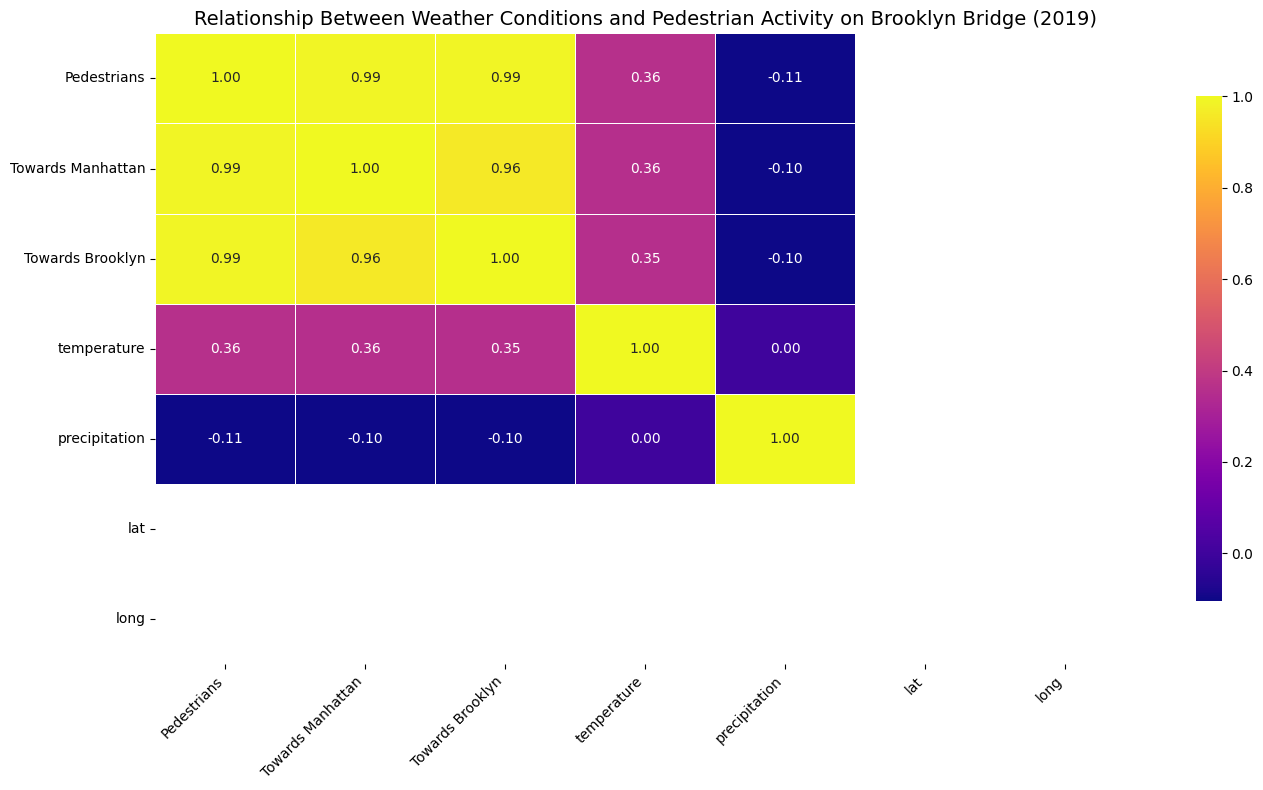

In [13]:

import seaborn as sn

brooklyn_2019 = traffic_data[
    (traffic_data['hour_beginning'].dt.year == 2019) &
    (traffic_data['location'] == "Brooklyn Bridge")
]

# Remove rows where 'Pedestrians' or 'weather_summary' data is missing
brooklyn_2019 = brooklyn_2019.dropna(subset=['Pedestrians', 'weather_summary'])

# Convert categorical weather summaries into numerical format using one-hot encoding
encoded_data = pd.get_dummies(brooklyn_2019, columns=['weather_summary'], prefix='Weather')

# Drop non-numeric columns that are irrelevant for correlation analysis
columns_to_remove = ['hour_beginning', 'location', 'events', 'Location1']
encoded_data = encoded_data.drop(columns=[col for col in columns_to_remove if col in encoded_data.columns], errors='ignore')

# Ensure only numeric columns remain for correlation computation
encoded_data = encoded_data.select_dtypes(include=['number'])

# Calculate the correlation matrix to identify relationships between weather and pedestrian counts
correlation_matrix = encoded_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(14, 8))
sn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="plasma", linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title("Relationship Between Weather Conditions and Pedestrian Activity on Brooklyn Bridge (2019)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

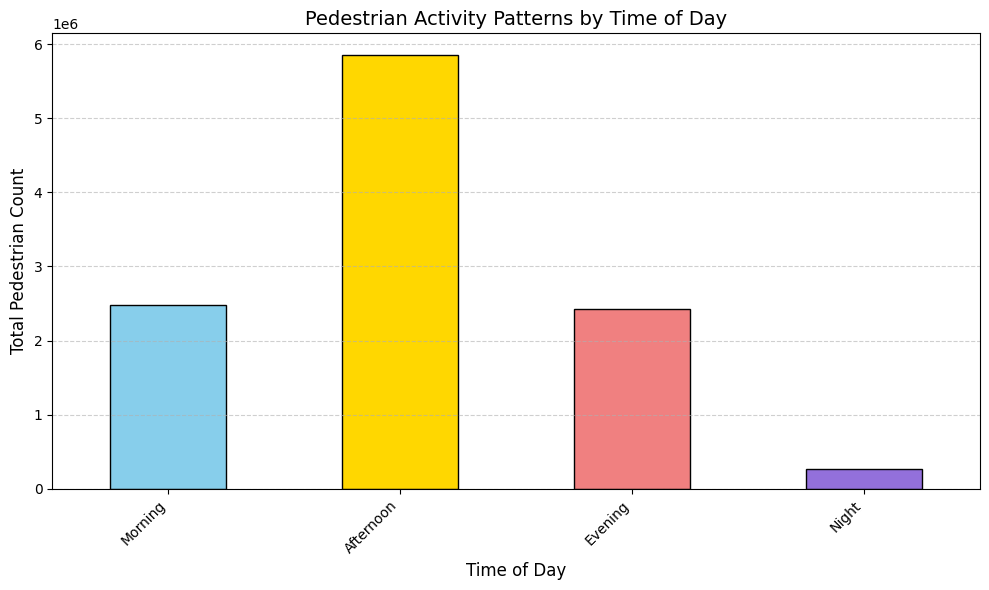

In [12]:
# Define a function to classify hours into time-of-day categories
def classify_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Create a new column 'time_of_day' by applying the classification function
traffic_data['time_of_day'] = traffic_data['hour_beginning'].dt.hour.apply(classify_time_of_day)

# Calculate total pedestrian counts for each time-of-day category
time_of_day_activity = traffic_data.groupby('time_of_day')['Pedestrians'].sum()

# Reorder the categories for logical visualization
time_of_day_activity = time_of_day_activity.reindex(["Morning", "Afternoon", "Evening", "Night"])

# Plot the pedestrian activity by time of day
plt.figure(figsize=(10, 6))
time_of_day_activity.plot(kind='bar', color=['skyblue', 'gold', 'lightcoral', 'mediumpurple'], edgecolor='black')
plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Total Pedestrian Count", fontsize=12)
plt.title("Pedestrian Activity Patterns by Time of Day", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()